In [4]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set_style('darkgrid')

Parameter format not correct - "DATA".


In [5]:
df = pd.read_csv('DATA/Opt_CL_BUY2_STAT_MINI.csv')

df.head()

,Profit,HH,Input,Score,ADX_Main,ADX_SMA,Dist_ADX,Dist_Step,H1,L1,...,I14,I15,I16,I17,I18,I19,I20,I21,I22,I23
0,0,7,1.001477,0.494697,-1.060531,14.773667,0.702211,0.856789,100.212841,99.946790,...,0,1,0,1,1,0,0,0,1,0
1,0,8,1.000177,0.493091,-1.381823,1.771479,1.388152,0.915693,100.017699,99.752212,...,1,0,0,0,1,0,0,1,1,0
2,1,9,1.000473,0.479436,-4.112884,4.733728,0.895130,0.823279,100.177588,99.964482,...,1,0,0,0,0,0,0,0,0,0
3,0,10,1.000236,0.474697,-5.060678,2.358769,1.388069,1.223912,100.389587,99.911457,...,0,1,0,1,1,0,1,0,1,0
4,1,11,1.000295,0.503537,0.707306,2.952291,1.206462,1.135116,100.053126,99.858332,...,1,0,0,0,0,0,0,0,0,0


In [10]:
df=df.dropna()

In [8]:
df.var()

Profit           0.249476
HH              42.001245
Input            0.000002
Score            0.000214
ADX_Main         8.551472
ADX_SMA        224.923824
Dist_ADX         8.084490
Dist_Step        0.589919
H1               0.052450
L1               0.016915
O1               0.000266
C1               0.054183
V1           11944.798202
H2               0.014930
L2               0.022894
O2               0.033354
C2               0.000000
V2               0.000000
I1               0.164162
I2               0.232661
I3               0.214353
I4               0.188694
I5               0.194597
I6               0.223754
I7               0.216091
I8               0.247559
I9               0.215010
I10              0.248064
I11              0.243851
I12              0.250141
I13              0.105432
I14              0.226511
I15              0.248949
I16              0.125058
I17              0.214353
I18              0.246868
I19              0.036363
I20              0.242595
I21         

In [11]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = x.iloc[:len(x)-100,1:], x.iloc[len(x)-100: ,1:],  y.iloc[:len(x)-100], y.iloc[len(x)-100: ]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1621, 39)
(100, 39)
(1621,)
(100,)


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

knn = KNeighborsClassifier()

param_grid = {'n_neighbors':[5,10,15,25,30,50]}

grid_knn = GridSearchCV(knn,param_grid,scoring='accuracy',cv = 10,refit = True)

In [13]:
grid_knn.fit(x_train,y_train)
print("Best Score ==> ", grid_knn.best_score_)
print("Tuned Paramerers ==> ",grid_knn.best_params_)
print("Accuracy on Train set ==> ", grid_knn.score(x_train,y_train))
print("Accuracy on Test set ==> ", grid_knn.score(x_test,y_test))

Best Score ==>  0.5225441187608878
Tuned Paramerers ==>  {'n_neighbors': 25}
Accuracy on Train set ==>  0.5743368291178285
Accuracy on Test set ==>  0.54


In [14]:
grid_knn.predict(x_test)

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

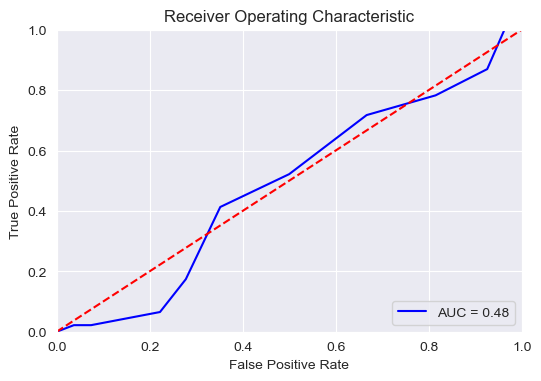

In [15]:
probs = grid_knn.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(dpi=100)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [16]:
import joblib
joblib.dump(grid_knn,'knnmodel')

['knnmodel']

# Decision Tree Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

param_grid = {'criterion':['gini','entropy'],'max_depth':np.arange(2,10),'min_samples_leaf':[0.2,0.4,0.6,0.8,0.9,1]}

grid_dtc = RandomizedSearchCV(dtc,param_grid,scoring='accuracy',cv = 10,refit = True)

In [17]:
grid_dtc.fit(x_train,y_train)
print("Best Score ==> ", grid_dtc.best_score_)
print("Tuned Paramerers ==> ",grid_dtc.best_params_)
print("Accuracy on Train set ==> ", grid_dtc.score(x_train,y_train))
print("Accuracy on Test set ==> ", grid_dtc.score(x_test,y_test))

Best Score ==>  0.5410399151707945
Tuned Paramerers ==>  {'min_samples_leaf': 0.2, 'max_depth': 8, 'criterion': 'entropy'}
Accuracy on Train set ==>  0.5601480567550895
Accuracy on Test set ==>  0.53


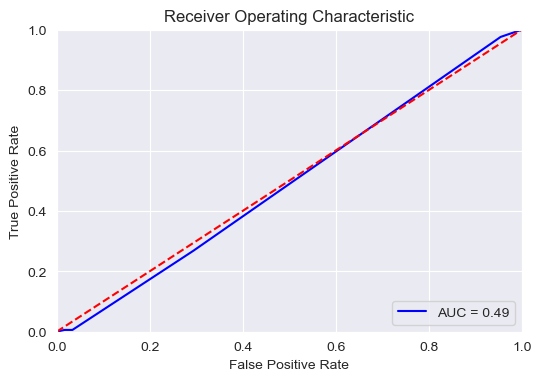

In [19]:
probs = grid_dtc.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(dpi=100)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [20]:
import joblib
joblib.dump(grid_dtc,'forestttt')

['forestttt']

# SVC

In [18]:
from sklearn.svm import SVC

svc = SVC(probability=True)

param_grid = {'kernel':['rbf','linear'],'C':[0.01,0.1,1,0.001],'gamma':[0.1,0.01,0.2,0.4]}

print('this is svc')
grid_svc = RandomizedSearchCV(svc,param_grid,scoring='accuracy',cv = 10,refit = True)

this is svc


In [19]:
grid_svc.fit(x_train,y_train)
print("Best Score ==> ", grid_svc.best_score_)
print("Tuned Paramerers ==> ",grid_svc.best_params_)
print("Accuracy on Train set ==> ", grid_svc.score(x_train,y_train))
print("Accuracy on Test set ==> ", grid_svc.score(x_test,y_test))

Best Score ==>  0.5379724305082179
Tuned Paramerers ==>  {'kernel': 'linear', 'gamma': 0.2, 'C': 0.01}
Accuracy on Train set ==>  0.5508945095619988
Accuracy on Test set ==>  0.58


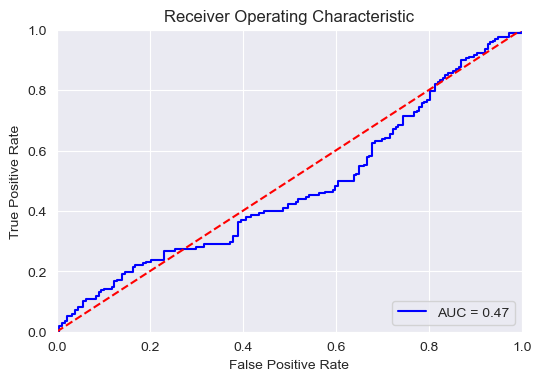

In [23]:
probs = grid_svc.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(dpi=100)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Voting Classifier

In [20]:
from sklearn.ensemble import VotingClassifier

classifiers = [('knn',grid_knn),('tree',grid_dtc),('svc',grid_svc)]

vtc = VotingClassifier(classifiers)

In [22]:
vtc.fit(x_train,y_train)
print("Accuracy on Test set ==> ", vtc.score(x_test,y_test))

KeyboardInterrupt: 

# Feature Selection

Let us first use RFE to select important features.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

for i in range(2,7):
    rfe = RFE(estimator=RandomForestClassifier(),n_features_to_select=i, verbose=0)
    rfe.fit(x_train,y_train)
    print(f"Accuracy with Feature {i} ==>",metrics.accuracy_score(y_test, rfe.predict(x_test)))

In [ ]:
rfe = RFE(estimator=RandomForestClassifier(),n_features_to_select=4, verbose=0)
rfe.fit(x_train,y_train)

# Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

param_grid = {'n_estimators':[200,500,1000],
              'max_depth':[2,3,4,5],
              'min_samples_leaf':[0.2,0.4,0.6,0.8,1],
              'max_features':['auto','sqrt'],
              'criterion':['gini','entropy']}

grid_rfc = RandomizedSearchCV(rfc,param_grid,n_iter=20,scoring='accuracy',cv = 10,refit = True)

In [24]:
grid_rfc.fit(x_train,y_train)
print("Best Score ==> ", grid_rfc.best_score_)
print("Tuned Paramerers ==> ",grid_rfc.best_params_)
print("Accuracy on Train set ==> ", grid_rfc.score(x_train,y_train))
print("Accuracy on Test set ==> ", grid_rfc.score(x_test,y_test))

Best Score ==>  0.5509429675073847
Tuned Paramerers ==>  {'n_estimators': 500, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 3, 'criterion': 'gini'}
Accuracy on Train set ==>  0.5983960518198643
Accuracy on Test set ==>  0.57


In [ ]:
probs = grid_rfc.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(dpi=100)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# XGBoost Classifier

In [30]:
from xgboost import xgboost as xgb

xgbcl = xgb.XGBClassifier()

param_grid = {'booster':['gbtree','gblinear'],
             'colsample_bytree':[0.4,0.6,0.8,1],
             'learning_rate':[0.01,0.1,0.2,0.4],
             'max_depth':[2,3,4,6],
             'n_estimators':[200,300,400,500],
              'subsample':[0.4,0.6,0.8,1]}

grid_xgb = RandomizedSearchCV(xgbcl,param_grid,n_iter=30,scoring='accuracy',cv = 10,refit = True)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
grid_xgb.fit(x_train_std,y_train)
print("Best Score ==> ", grid_xgb.best_score_)
print("Tuned Paramerers ==> ",grid_xgb.best_params_)
print("Accuracy on Train set ==> ", grid_xgb.score(x_train_std,y_train))
print("Accuracy on Test set ==> ", grid_xgb.score(x_test_std,y_test))

In [ ]:
probs = grid_xgb.predict_proba(x_test_std)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(dpi=100)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# ANN

In [ ]:
pip install keras

In [ ]:
pip install tensorflow

In [105]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


classifier = Sequential()

classifier.add(Dense(units= 15, kernel_initializer = 'uniform', activation = 'relu', input_dim = 39))
classifier.add(Dropout(0.1))

#classifier.add(Dense(units= 20, kernel_initializer = 'uniform', activation = 'relu'))
#classifier.add(Dropout(0.2))

#classifier.add(Dense(units= 10, kernel_initializer = 'uniform', activation = 'relu'))
#classifier.add(Dropout(0.2))

#classifier.add(Dense(units= 5, kernel_initializer = 'uniform', activation = 'relu'))
#classifier.add(Dropout(0.2))

classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


classifier.compile(optimizer = 'Rmsprop', loss = 'mean_squared_error', metrics = ['accuracy'])

classifier.fit(x_train, y_train, batch_size = 12, epochs = 100)


Epoch 1/100
136/136 [==============================] - 1s 2ms/step - loss: 0.2540 - accuracy: 0.5040
Epoch 2/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2511 - accuracy: 0.5250
Epoch 3/100
136/136 [==============================] - 0s 1ms/step - loss: 0.2508 - accuracy: 0.5114
Epoch 4/100
136/136 [==============================] - 0s 2ms/step - loss: 0.2501 - accuracy: 0.5238
Epoch 5/100
136/136 [==============================] - 0s 1ms/step - loss: 0.2501 - accuracy: 0.5157
Epoch 6/100
136/136 [==============================] - 0s 1ms/step - loss: 0.2502 - accuracy: 0.5170
Epoch 7/100
136/136 [==============================] - 0s 1ms/step - loss: 0.2497 - accuracy: 0.5299
Epoch 8/100
136/136 [==============================] - 0s 1ms/step - loss: 0.2501 - accuracy: 0.5163
Epoch 9/100
136/136 [==============================] - 0s 1ms/step - loss: 0.2495 - accuracy: 0.5213
Epoch 10/100
136/136 [==============================] - 0s 1ms/step - loss: 0.2496 - accura

In [106]:
y_pred_test = classifier.predict(x_test)
y_pred_test=y_pred_test>0.5
import numpy as np
y_pred_train = classifier.predict(x_train)
y_pred_train=y_pred_train>0.5

print("Accuracy on Train Set ==> ",metrics.accuracy_score(y_train,y_pred_train))
print("Accuracy on Test Set ==> ",metrics.accuracy_score(y_test,y_pred_test))
classifier.predict(x_test)

Accuracy on Train Set ==>  0.5607649599012955
Accuracy on Test Set ==>  0.58


array([[0.4511681 ],
       [0.4511681 ],
       [0.4511681 ],
       [0.53785247],
       [0.4511681 ],
       [0.45995194],
       [0.4842292 ],
       [0.4511681 ],
       [0.4685563 ],
       [0.53080654],
       [0.4511681 ],
       [0.4511681 ],
       [0.45585945],
       [0.4588128 ],
       [0.4511681 ],
       [0.4511681 ],
       [0.5664831 ],
       [0.54363453],
       [0.4511681 ],
       [0.4511681 ],
       [0.4511681 ],
       [0.48825663],
       [0.4511681 ],
       [0.48611924],
       [0.4511681 ],
       [0.4511681 ],
       [0.4511681 ],
       [0.46768653],
       [0.49663818],
       [0.49339694],
       [0.4511681 ],
       [0.4511681 ],
       [0.4511681 ],
       [0.4511681 ],
       [0.4511681 ],
       [0.4511681 ],
       [0.5058025 ],
       [0.49504876],
       [0.50759655],
       [0.4511681 ],
       [0.4511681 ],
       [0.467535  ],
       [0.46973777],
       [0.4877586 ],
       [0.4511681 ],
       [0.4511681 ],
       [0.56465465],
       [0.451

array([[0.4853675 ],
       [0.49551308],
       [0.46735808],
       [0.5191662 ],
       [0.49455348],
       [0.49809656],
       [0.4968466 ],
       [0.48123625],
       [0.4868627 ],
       [0.5191662 ],
       [0.47534966],
       [0.47086224],
       [0.39085653],
       [0.4641539 ],
       [0.4676702 ],
       [0.47773418],
       [0.5191662 ],
       [0.5191662 ],
       [0.4824689 ],
       [0.47118476],
       [0.47690743],
       [0.485538  ],
       [0.49226955],
       [0.49306694],
       [0.49625945],
       [0.47653487],
       [0.4488823 ],
       [0.47501743],
       [0.50610024],
       [0.5191662 ],
       [0.4803593 ],
       [0.4707781 ],
       [0.4635085 ],
       [0.46700826],
       [0.46147388],
       [0.4783364 ],
       [0.47800782],
       [0.4868579 ],
       [0.5191662 ],
       [0.46906984],
       [0.5156547 ],
       [0.48617896],
       [0.5119802 ],
       [0.47569713],
       [0.46065795],
       [0.49012974],
       [0.5151319 ],
       [0.472

In [49]:
from keras.models import load_model
classifier.save('my_model.h5')


In [50]:
model = load_model('my_model.h5')
model.predict([[7,1.001477367,0.494697346,-1.060530806,14.77366742,0.702211355,0.856788812,100.2128414,99.94678964,99.98226321,100.1951046,95.92616168,100.0709471,99.82263214,99.82263214,100,100,0,1,1,0,1,1,0,0,1,0,0,1,1,0,1,0,1,1,0,0,0,1,0]])

array([[0.42346734]], dtype=float32)

In [51]:
model.predict(x_test)

array([[0.49564937],
       [0.4523365 ],
       [0.44233447],
       [0.45369822],
       [0.49564937],
       [0.44764253],
       [0.4331173 ],
       [0.4603367 ],
       [0.49564937],
       [0.45878386],
       [0.45705584],
       [0.41512457],
       [0.49564937],
       [0.4593022 ],
       [0.49423638],
       [0.4594418 ],
       [0.43933722],
       [0.44092909],
       [0.49564937],
       [0.4770253 ],
       [0.46099398],
       [0.49564937],
       [0.44130903],
       [0.4558919 ],
       [0.4608317 ],
       [0.49564937],
       [0.44121742],
       [0.49564937],
       [0.45981258],
       [0.44926178],
       [0.4476006 ],
       [0.46010733],
       [0.45444164],
       [0.49564937],
       [0.4733294 ],
       [0.49564937],
       [0.45874584],
       [0.45487425],
       [0.44966388],
       [0.4557115 ],
       [0.49564937],
       [0.46018684],
       [0.4291777 ],
       [0.43664443],
       [0.49564937],
       [0.45653918],
       [0.49564937],
       [0.457

In [44]:
import joblib
joblib.dump(classifier,'ANN1model')

INFO:tensorflow:Assets written to: ram://4491f8dc-7f49-4784-9beb-793203747231/assets


NotFoundError: 